## 투빅스 18기 Week4 차워축소 과제2 - 18기 이다인

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

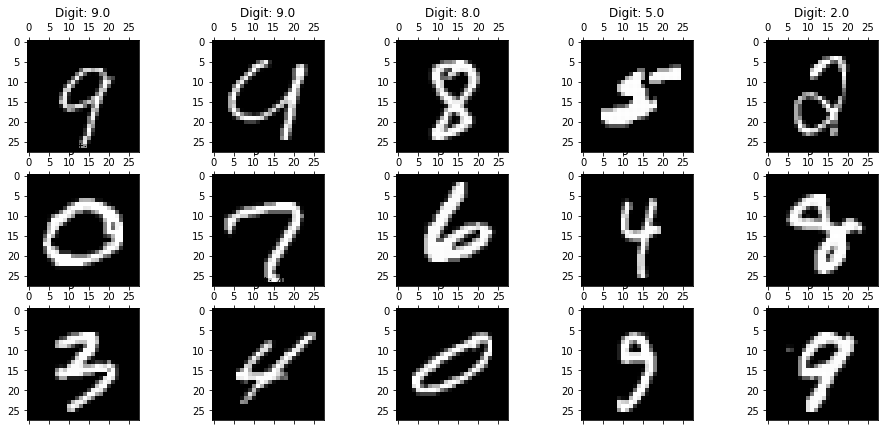

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [9]:
# pca 진행 전에 표준화를 진행해야하기 때문에 sklearn에서 제공하는 standardscaler를
#사용하여 데이터 스케일링을 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test  = scaler.transform(X_test)

### 주성분 개수 결정
1. 총분산의 설명 비중이 70~90% 사이인 지점에서 선택
2. (표준화된 변수 사용시)고유값이 1 이하인 주성분 제거 or 0.7보다 작은 고유값 제거
3. Scree Plot 에서 Elbow point를 기준으로 결정

### PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
# 90%의 설명력을 가지는 주성분 개수
pca1 = PCA(n_components=0.9)
pca1.fit(X_scaled_train)
pca1.n_components_

234

In [12]:
# 80%의 설명력을 가지는 주성분 개수
pca2 = PCA(n_components=0.8)
pca2.fit(X_scaled_train)
pca2.n_components_

146

In [13]:
# 70%의 설명력을 가지는 주성분 개수
pca3 = PCA(n_components=0.7)
pca3.fit(X_scaled_train)
pca3.n_components_

96

In [14]:
#고유값이 1이상인 주성분 개수 확인
pca = PCA()
pca.fit(X_scaled_train)
n = pca.explained_variance_
n[n>=1].shape

(163,)

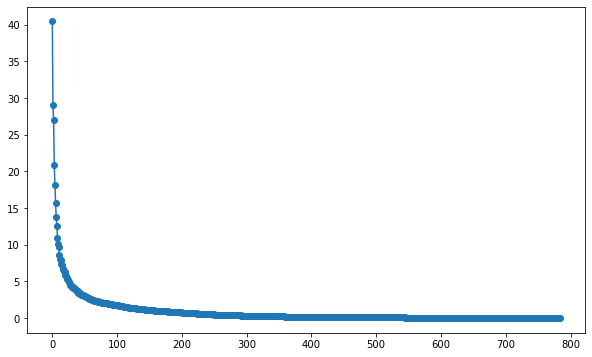

In [15]:
# Elbow Point 를 확인
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n.shape[0]), n, marker='o')
plt.show()

* 데이터의 양이 많아 elbow point가 잘 관찰되지 않는다. 따라서 범위를 확대해서 다시 살펴보고자 한다.

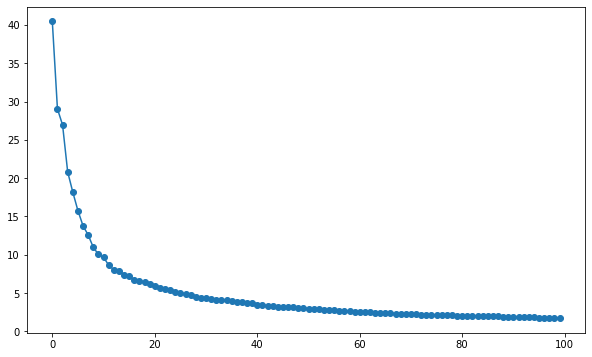

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n[:100].shape[0]), n[:100], marker='o')
plt.show()

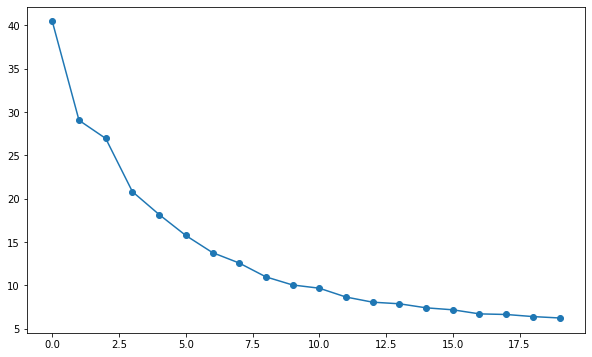

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n[:20].shape[0]), n[:20], marker='o')
plt.show()

* 확인해본 결과 10에서 20사이에서 elbow point가 관찰된다고 유추해볼 수 있다.

### LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis()
lda_X = lda.fit_transform(X_scaled_train,y_train.reshape(-1))
lda_X.shape

(56000, 9)

* 총 9개의 변수로 축소시킨 것을 알 수 있다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

### randomforest

#### 1. 원본 데이터 사용

In [21]:
original_rf = RandomForestClassifier(random_state=42)
t1 = time.time()
original_rf.fit(X_scaled_train, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, original_rf.predict(X_scaled_test))}')

training time: 40.62363600730896, accuracy score: 0.9700714285714286


#### 2. pca로 축소한 데이터 사용

In [22]:
#pca에서 주성분 개수는 70%의 설명력을 가지는 변수 개수를 채택하여 사용하였다
pca=PCA(n_components=95)
X_train_pca = pca.fit_transform(X_scaled_train)
X_test_pca = pca.transform(X_scaled_test)

In [23]:
pca_rf = RandomForestClassifier(random_state=42)
t1 = time.time()
pca_rf.fit(X_train_pca, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, pca_rf.predict(X_test_pca))}')

training time: 74.02538180351257, accuracy score: 0.9469285714285715


#### 3. lda로 축소한 데이터 사용

In [24]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_scaled_train, y_train)
X_test_lda = lda.transform(X_scaled_test)

In [25]:
lda_rf = RandomForestClassifier(random_state=42)
t1 = time.time()
lda_rf.fit(X_train_lda, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, lda_rf.predict(X_test_lda))}')

training time: 26.202863693237305, accuracy score: 0.9139285714285714


* 3가지 데이터 형태로 randomforestclassifier을 진행해본 결과 가장 경과시간이 짧았던 건 역시나 변수의 개수가 가장 작은lda였음을 알 수 있었다.
* 또한 경과시간이 가장 길었던 데이터는 pca로 데이터 축소를 진행했던 데이터 였는데, 본래대로라면 가장 경과시간이 길어야 하는 데이터는 원본데이터여야 한다. 따라서 추가로 elbow point를 통해 구했던 변수의 개수로 모델 학습을 진행해보았다.

In [27]:
pca_2=PCA(n_components=20)
X_train_pca2 = pca_2.fit_transform(X_scaled_train)
X_test_pca2 = pca_2.transform(X_scaled_test)

In [28]:
pca_rf2 = RandomForestClassifier(random_state=42)
t1 = time.time()
pca_rf2.fit(X_train_pca2, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, pca_rf2.predict(X_test_pca2))}')

training time: 31.437164068222046, accuracy score: 0.9359285714285714


* 그 결과 경과시간이 훨씬 짧아진 것을 알 수 있었다.
* accuracy는 원본데이터에서 가장 높았던 것을 알 수 있으며, 사용하는 변수의 개수가 작아질수록 정확도가 낮아지는 것을 알 수 있었다.

### LogisticRegression

#### 1. 원본 데이터 사용

In [29]:
original_rl = LogisticRegression(random_state=42)
t1 = time.time()
original_rl.fit(X_scaled_train, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, original_rl.predict(X_scaled_test))}')

training time: 20.466923236846924, accuracy score: 0.9175714285714286


#### 2. pca로 축소한 데이터 사용

In [30]:
#주성분 개수 95개
pca_rl = LogisticRegression(random_state=42)
t1 = time.time()
pca_rl.fit(X_train_pca, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, pca_rl.predict(X_test_pca))}')

training time: 6.002462148666382, accuracy score: 0.9159285714285714


In [31]:
# 주성분 개수 20개
pca_rl2 = LogisticRegression(random_state=42)
t1 = time.time()
pca_rl2.fit(X_train_pca2, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, pca_rl2.predict(X_test_pca2))}')

training time: 5.390993595123291, accuracy score: 0.8686428571428572


In [32]:
lda_rl = LogisticRegression(random_state=42)
t1 = time.time()
lda_rl.fit(X_train_lda, y_train)
t2 = time.time()

print(f'training time: {t2-t1}, accuracy score: {accuracy_score(y_test, lda_rl.predict(X_test_lda))}')

training time: 2.962357997894287, accuracy score: 0.8861428571428571


* 경과시간은 사용하는 변수의 개수가 작아질 수록 짧아진 것을 확인할 수 있으며, 정확도는 그 와 반대로 하용하는 변수의 개수가 많아질 수록 높아지는 것을 확인할 수 있었다.

* 사용한 두가지 모델 중에서 randomforest 모델이 정확도가 전체적으로 높은 것을 확인할 수 있으며, 그 중에서도 가장 정확도가 높은 것은 원본데이터를 사용했을 경우이다.

특정한 틀 없이 자유롭게 해주시면 됩니다!